In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 13

In [7]:
df = pd.read_csv('diabetes.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
# function to plot the histogram for each feature for outcome 0 (no diabetes) and 1 (diabetes)
def plot_dist(column, counter):
    plt.figure(figsize=(14, 6))
    x_lim = (df[column].min(), df[column].max())
    plt.subplot(121)
    sub_plot1 = df[df['Outcome'] == 0]
    sub_plot1[column].plot(kind='hist')
    plt.xlabel(column)
    plt.xlim(x_lim)
    if counter == 0:
        plt.title('No Diabetes', fontsize=14)
    plt.subplot(122)
    sub_plot2 = df[df['Outcome'] == 1]
    sub_plot2[column].plot(kind='hist')
    plt.xlabel(column)
    plt.xlim(x_lim)
    if counter == 0:
        plt.title('Diabetes', fontsize=14)

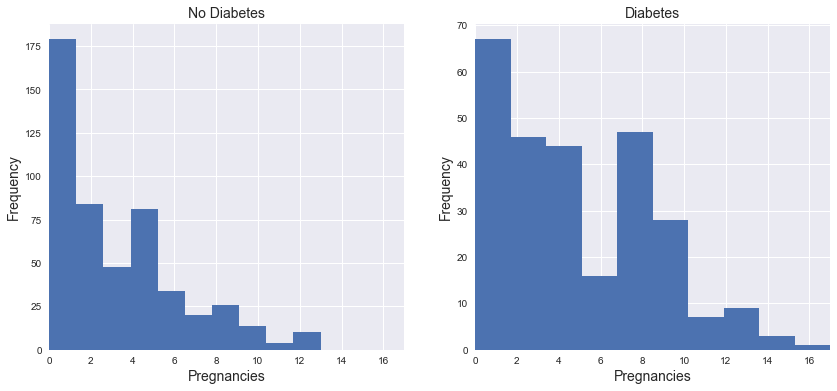

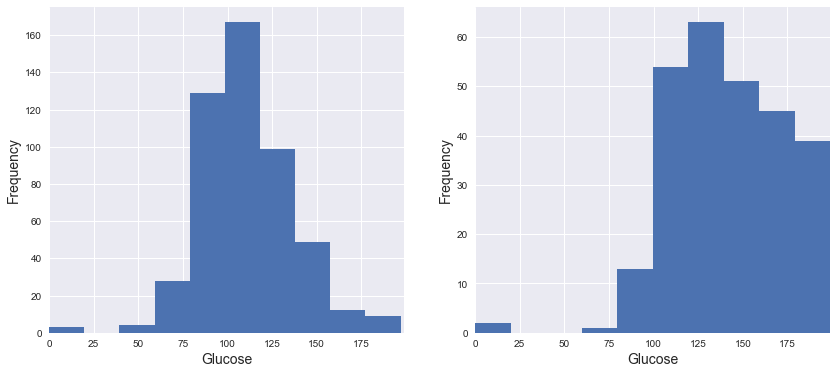

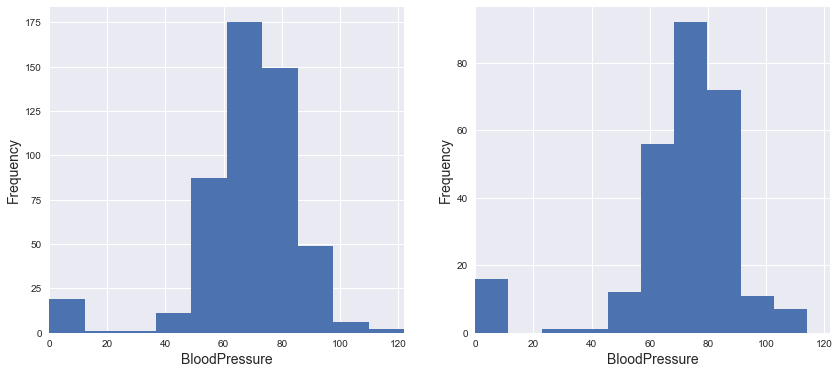

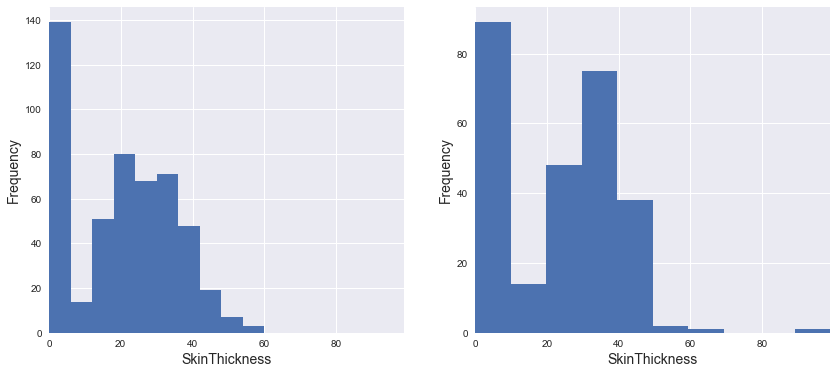

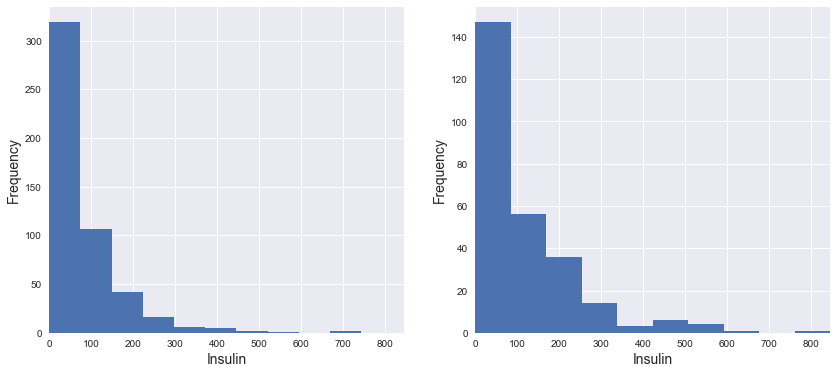

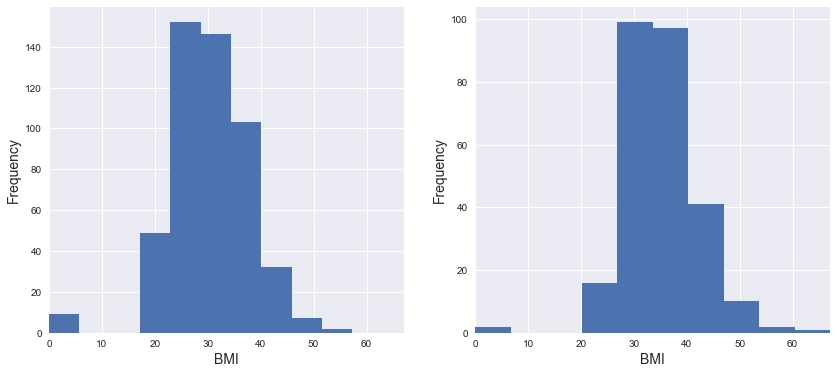

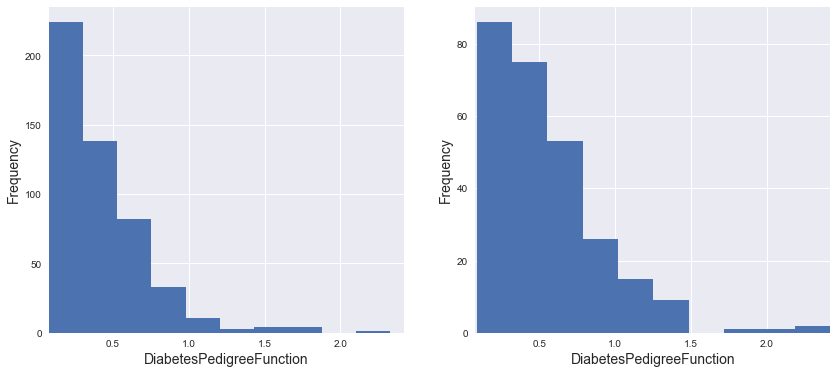

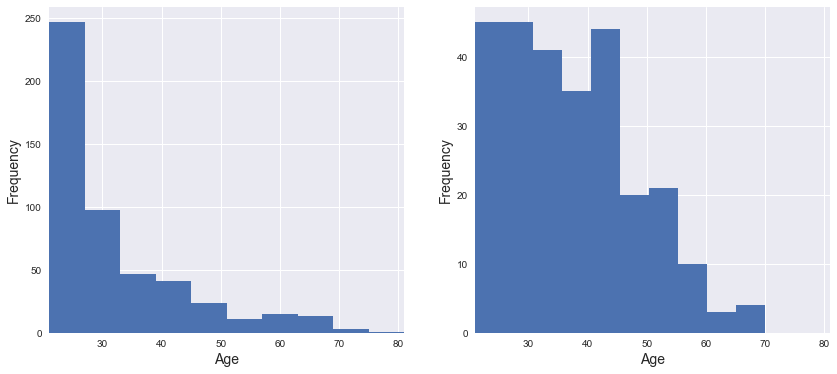

In [19]:
# plot the histogram for each feature for outcome 0 (no diabetes) and 1 (diabetes)
counter = 0
for col in df.columns:
    if (col != 'Outcome'):
        plot_dist(col, counter)
        counter = counter + 1

In [21]:
# use standardscaler to normalize the data set
from sklearn.preprocessing import StandardScaler
x_data = df.drop('Outcome', axis=1)
y_data = df['Outcome']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data)

In [29]:
# the plot function to check the histogram for each feature before and after normalization
def plot_ori_nor(org, scaled, col, title):
    col_name = org.columns[col]
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    org.iloc[:, col].hist()
    plt.title(f'{col_name} {title[0]}')
    plt.subplot(1, 2, 2)
    pd.Series(scaled[:, col]).hist()
    plt.title(f'{col_name} {title[1]}')

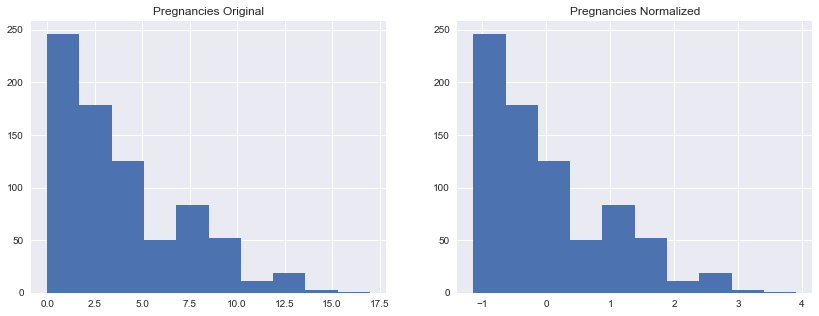

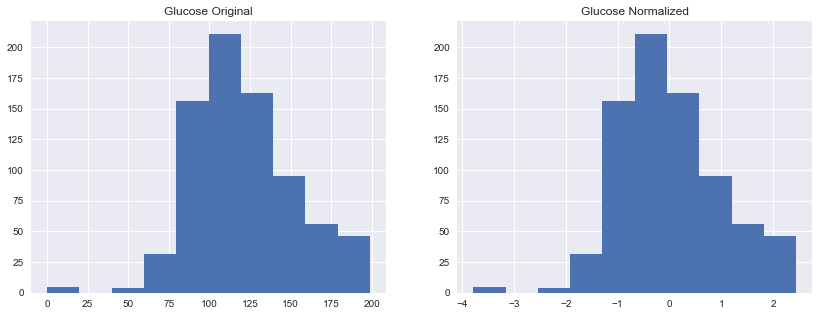

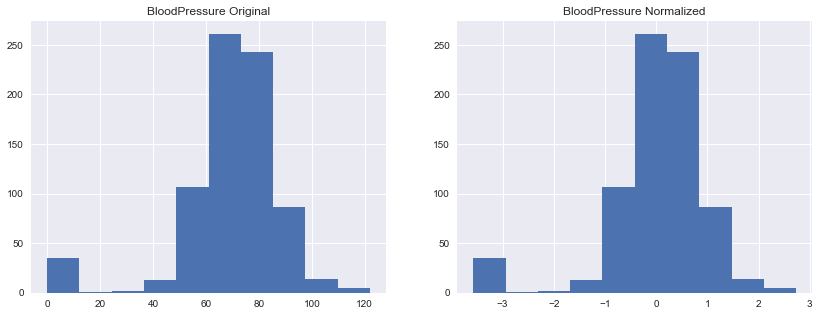

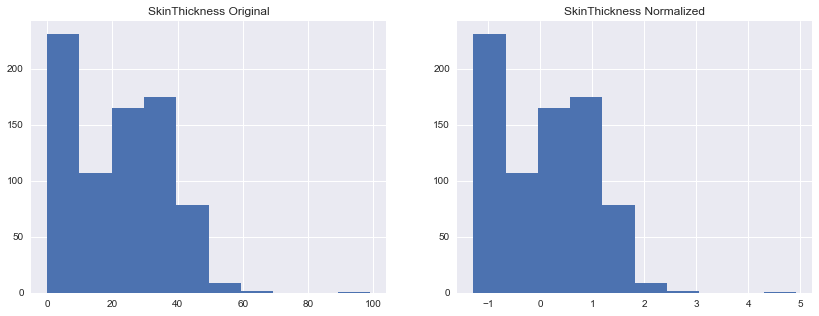

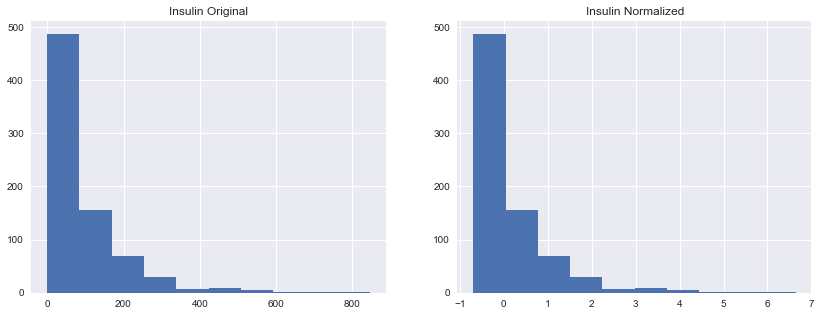

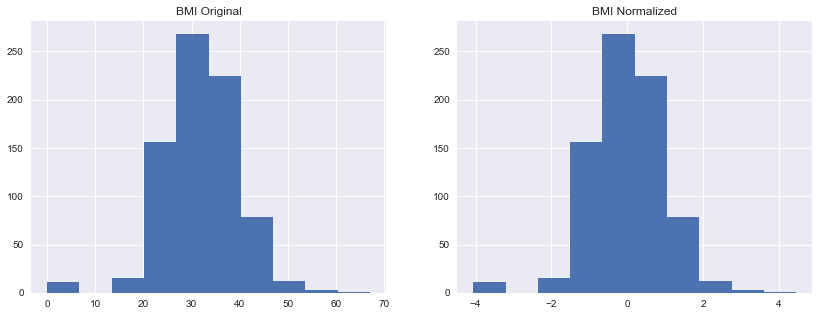

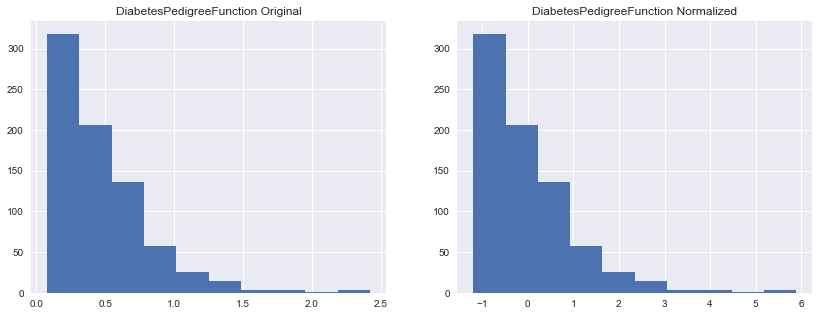

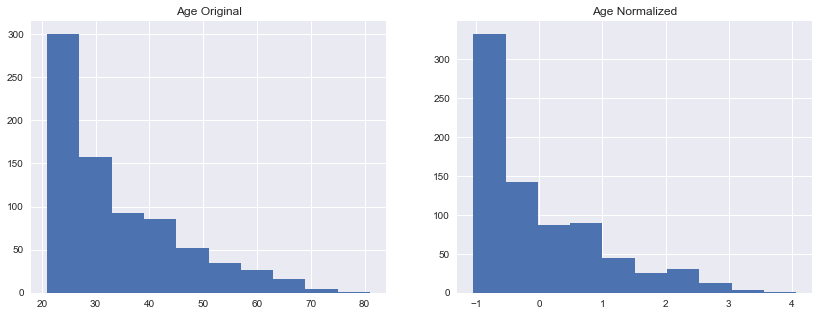

In [30]:
# check the distribution of each feature before and after normalization to ensure the original
# dataset can be normalized, meaing having normal distribution 
for col in range(len(x_data.columns)):
    title = ['Original', 'Normalized']
    plot_ori_nor(x_data, x_scaled, col, title)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_data, test_size=0.3, random_state=0)

In [115]:
# set up the range for k
k_start = 1
k_end = 20
# initialize the evaluation matrices
train_accuracy = np.zeros(k_end - k_start)
test_accuracy = np.zeros(k_end - k_start)
counter = 0
# fit the data using K nearest neighors and loop through k
for k in range(k_start, k_end):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train, y_train)
    train_accuracy[counter] =  neigh.score(x_train, y_train)
    test_accuracy[counter] =  neigh.score(x_test, y_test)
    counter = counter + 1

Text(0, 0.5, 'Accuracy Score')

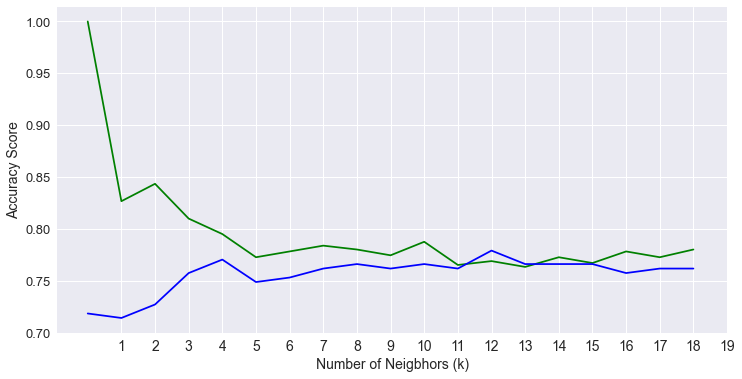

In [116]:
# plot accuracy score
plt.plot(train_accuracy, 'g-', test_accuracy, 'b-')
plt.xticks(ticks=range(k_start, k_end))
plt.xlabel('Number of Neigbhors (k)')
plt.ylabel('Accuracy Score')

In [117]:
print(f'the maximum accuracy score is {accuracy.max()} and k is {np.argmax(accuracy) + 1}')

the maximum accuracy score is 0.7792207792207793 and k is 13


Text(0, 0.5, 'Count')

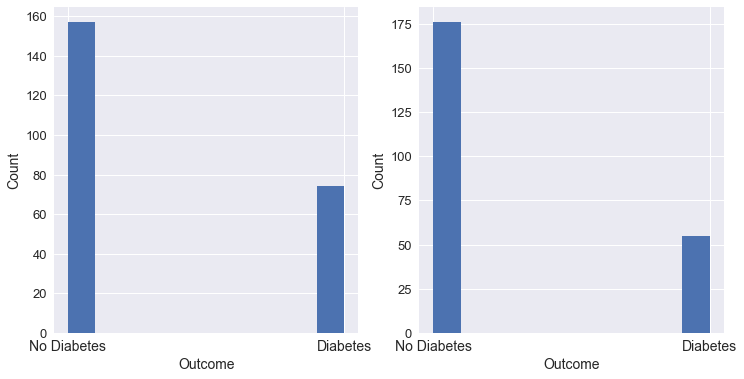

In [128]:
# plot the distribution plot for real and predicted value when k = 13
k = 13
neigh2 = KNeighborsClassifier(n_neighbors=k)
neigh2.fit(x_train, y_train)
y_hat = neigh2.predict(x_test)
plt.subplot(121)
plt.hist(y_test)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.subplot(122)
plt.hist(y_hat)
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.xlabel('Outcome')
plt.ylabel('Count')